In [34]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cpcc = pd.read_csv('../data/interim/costanzo_pcc_ALL')

In [22]:
def get_giant_component(G):
    Gc = max([G.subgraph(c).copy() for c in nx.connected_components(G)], key=len)
    return Gc

In [280]:
ne_ratio_list = []
nv_ratio_list = []

In [281]:
thr_list =  [0.05,0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5]

In [282]:
for i in np.arange(0.2,0.75,0.05):
    df = cpcc.loc[cpcc.pcc>i]
    nw = nx.from_pandas_edgelist(df,source='gene1',target='gene2')
    nw_g = get_giant_component(nw)
    n_e = len(nw_g.edges)
    ne_ratio_list.append(n_e/len(nw.edges))
    n_v = len(nw_g.nodes)
    nv_ratio_list.append(n_v/len(nw.nodes))

    print(f"{i} : ne = {n_e}, ne_ratio: {n_e/len(nw.edges)}, nv = {n_v}, nv_ratio = {n_v/len(nw.nodes)}")

0.2 : ne = 39807, ne_ratio: 0.9987455152169005, nv = 5183, nv_ratio = 0.9831183611532626
0.25 : ne = 20809, ne_ratio: 0.9893500689392859, nv = 3924, nv_ratio = 0.932287954383464
0.3 : ne = 10972, ne_ratio: 0.9426116838487972, nv = 2614, nv_ratio = 0.7959805115712546
0.35 : ne = 5857, ne_ratio: 0.8150570553854718, nv = 1686, nv_ratio = 0.646968534151957
0.39999999999999997 : ne = 862, ne_ratio: 0.21034651049292338, nv = 280, nv_ratio = 0.1423487544483986
0.44999999999999996 : ne = 246, ne_ratio: 0.10967454302273741, nv = 105, nv_ratio = 0.07553956834532374
0.49999999999999994 : ne = 93, ne_ratio: 0.07795473595976529, nv = 57, nv_ratio = 0.06168831168831169
0.5499999999999999 : ne = 26, ne_ratio: 0.044905008635578586, nv = 18, nv_ratio = 0.03180212014134275
0.5999999999999999 : ne = 20, ne_ratio: 0.07662835249042145, nv = 9, nv_ratio = 0.030303030303030304
0.6499999999999999 : ne = 10, ne_ratio: 0.08333333333333333, nv = 6, nv_ratio = 0.0379746835443038
0.7 : ne = 6, ne_ratio: 0.12, nv =

In [283]:
xlab = "Pearson's Correlation Coefficient threshold"

Text(0.5, 0, "Pearson's Correlation Coefficient threshold")

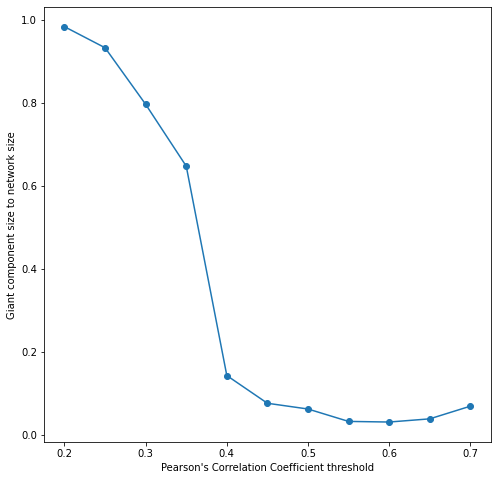

In [284]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(np.arange(0.2,0.75,0.05),nv_ratio_list,'o-')
ax.set_ylabel('Giant component size to network size')
ax.set_xlabel(xlab)

In [76]:
sensor_df_names = [ ]

In [285]:
def get_result_dfs(fname, thr_list, default_thr):
    dfs = {thr: pd.read_csv(f"../data/interim_{thr}/{fname}.csv") for thr in thr_list if thr!=default_thr}
    dfs[default_thr] = pd.read_csv(f"../data/interim/{fname}.csv")
    if default_thr not in thr_list:
        thr_list.insert(0, default_thr)                               
    return dfs

In [286]:
effector_dfs = get_result_dfs('effectors_df', thr_list, 0.2)

In [287]:
sensor_dfs =  get_result_dfs('sensors_df', thr_list, 0.2)

In [294]:
sensor_dfs[0.2].dropna(subset=['sensor_cluster']).loc[:,'sensor_cluster'].nunique()

9

In [297]:
def plot_go_thr_comparison(dfs, col, yaxis):
    n_goterms = []
    rat_goterms = []
    n_clusters = []
    n_go_clusters = []
    for i in thr_list:
        df = dfs[i]
        n_goterms.append(df.dropna(subset=['go_group']).shape[0])
        rat_goterms.append(n_goterms[-1]/df.shape[0])
        n_clusters.append(df.dropna(subset=[col]).loc[:,col].nunique())
        n_go_clusters.append(df.dropna(subset=[col]).loc[:,'go_group'].nunique())
        
    fig, axs = plt.subplots(2,2,figsize=(10,10))
    axs[0][0].plot(thr_list, n_goterms,'o-')
    axs[0][0].set_ylabel(f'Number of GO enriched {yaxis}s')

    axs[1][0].plot(thr_list, rat_goterms,'o-')
    axs[1][0].set_ylabel(f'%of {yaxis}s with GO term enrichments in all {yaxis}s')


    axs[0][1].plot(thr_list, n_clusters, 'o-')
    axs[0][1].set_ylabel(f'Number of {yaxis} clusters')
    axs[0][1].set_xlabel(xlab)
    
    axs[1][1].plot(thr_list, n_go_clusters, 'o-')
    axs[1][1].set_ylabel(f'Number of go enriched {yaxis} clusters')
    axs[1][1].set_xlabel(xlab)

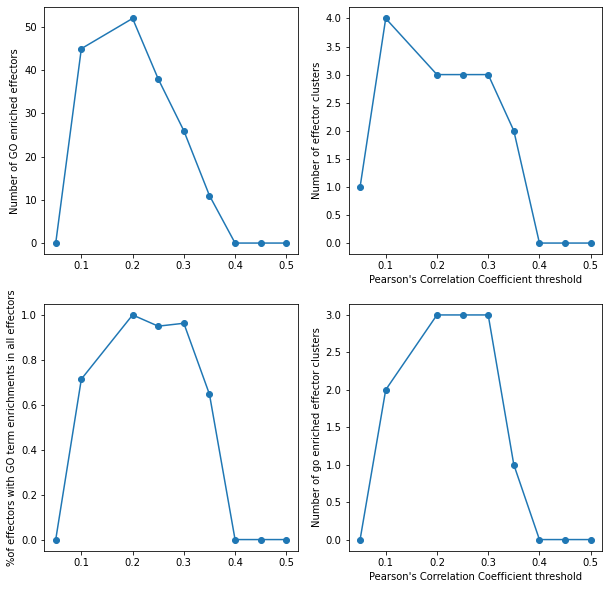

In [298]:
plot_go_thr_comparison(effector_dfs,'effector_cluster', 'effector')

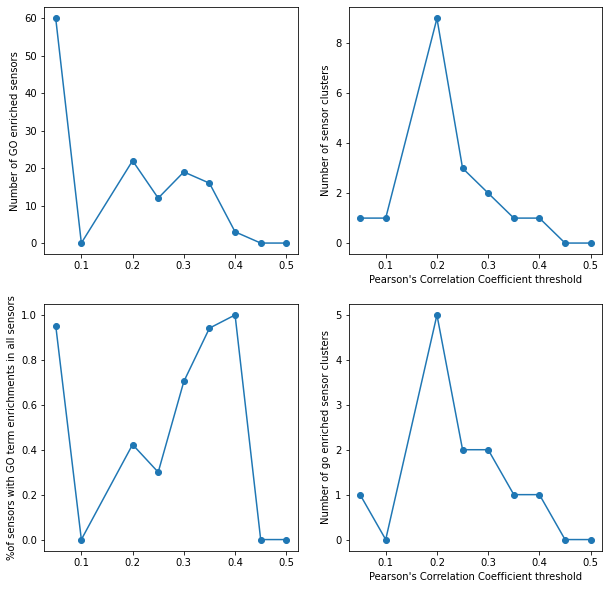

In [299]:
plot_go_thr_comparison(sensor_dfs,'sensor_cluster', 'sensor')

In [169]:
[np.intersect1d(sensor_dfs[0.5].orf_name, sensor_dfs[i].orf_name) for i in thr_list]

[array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array(['fzo1'], dtype=object)]

In [174]:
[np.intersect1d(effector_dfs[0.25].orf_name, effector_dfs[i].orf_name) for i in thr_list]

[array(['aim10', 'arl1', 'coa3', 'cog5', 'cog6', 'cog8', 'cop1-1', 'coq1',
        'cox11', 'cox15', 'cox17', 'csm3', 'cyc3', 'erv14', 'gab1-1',
        'gab1-2', 'gab1-3', 'gep5', 'gpi10-5001', 'gpi16-5001',
        'gpi17-5001', 'hrp1-4', 'kre5-ts2', 'las21', 'mad1', 'mrc1',
        'ost3', 'pet54', 'rip1', 'vti1-2', 'wbp1-1', 'wbp1-2', 'ypt1-3'],
       dtype=object),
 array(['aim10', 'arl1', 'coa3', 'cog2-1', 'cog5', 'cog6', 'cog7', 'cog8',
        'cop1-1', 'coq1', 'cox11', 'cox15', 'cox17', 'csm3', 'cyc3',
        'dam1-1', 'erv14', 'gab1-1', 'gab1-2', 'gab1-3', 'gep5', 'glo3',
        'gpi10-5001', 'gpi16-5001', 'gpi17-5001', 'hrp1-4', 'kre5-ts2',
        'las21', 'mad1', 'mrc1', 'ost3', 'pet54', 'rip1', 'tlg1-5005',
        'trs85', 'uso1-1', 'vti1-2', 'wbp1-1', 'wbp1-2', 'ypt1-3'],
       dtype=object),
 array(['coa3', 'cop1-1', 'coq1', 'cox11', 'cox15', 'csm3', 'dam1-1',
        'gab1-1', 'gab1-3', 'gep5', 'gpi16-5001', 'kre5-ts2', 'las21',
        'mad1', 'mrc1', 'ost3', 'pe

In [175]:
import itertools as itr

In [218]:
def get_pairwise_intersect(dfs, thr_list):
    pairs = itr.combinations(thr_list,2)
    nt = lambda a, b: [len(np.intersect1d(dfs[a].orf_name,effector_dfs[b].orf_name)) , len(dfs[b].orf_name)]
    res = dict([ (t, nt(*t)) for t in pairs ])

    return res

In [220]:
get_pairwise_intersect(effector_dfs, thr_list)

{(0.2, 0.25): [33, 40],
 (0.2, 0.3): [20, 27],
 (0.2, 0.35): [5, 17],
 (0.2, 0.4): [1, 3],
 (0.2, 0.45): [1, 2],
 (0.2, 0.5): [1, 1],
 (0.25, 0.3): [18, 27],
 (0.25, 0.35): [4, 17],
 (0.25, 0.4): [1, 3],
 (0.25, 0.45): [1, 2],
 (0.25, 0.5): [1, 1],
 (0.3, 0.35): [8, 17],
 (0.3, 0.4): [3, 3],
 (0.3, 0.45): [2, 2],
 (0.3, 0.5): [1, 1],
 (0.35, 0.4): [3, 3],
 (0.35, 0.45): [2, 2],
 (0.35, 0.5): [0, 1],
 (0.4, 0.45): [2, 2],
 (0.4, 0.5): [0, 1],
 (0.45, 0.5): [0, 1]}

In [221]:
get_pairwise_intersect(sensor_dfs, thr_list)

{(0.2, 0.25): [0, 40],
 (0.2, 0.3): [0, 27],
 (0.2, 0.35): [0, 17],
 (0.2, 0.4): [0, 3],
 (0.2, 0.45): [0, 1],
 (0.2, 0.5): [0, 1],
 (0.25, 0.3): [0, 27],
 (0.25, 0.35): [0, 17],
 (0.25, 0.4): [0, 3],
 (0.25, 0.45): [0, 1],
 (0.25, 0.5): [0, 1],
 (0.3, 0.35): [0, 17],
 (0.3, 0.4): [0, 3],
 (0.3, 0.45): [0, 1],
 (0.3, 0.5): [0, 1],
 (0.35, 0.4): [0, 3],
 (0.35, 0.45): [0, 1],
 (0.35, 0.5): [0, 1],
 (0.4, 0.45): [0, 1],
 (0.4, 0.5): [0, 1],
 (0.45, 0.5): [0, 1]}

In [223]:
pcc_dfs = get_result_dfs('pcc_df', thr_list,0.2)

In [233]:
pcc_dfs[i].corr().loc['deg','eff']

0.9203905376819284

In [236]:
[pcc_dfs[i].corr('pearson').loc['deg','sens'] for i in thr_list]

[0.13913489431379195,
 0.1224190391634265,
 0.3374750698590764,
 0.1836172611995399,
 -0.08122530817819895,
 -0.23685738216798707,
 -0.07267183919021618]

[<AxesSubplot:xlabel='deg', ylabel='eff'>,
 <AxesSubplot:xlabel='deg', ylabel='eff'>,
 <AxesSubplot:xlabel='deg', ylabel='eff'>,
 <AxesSubplot:xlabel='deg', ylabel='eff'>,
 <AxesSubplot:xlabel='deg', ylabel='eff'>,
 <AxesSubplot:xlabel='deg', ylabel='eff'>,
 <AxesSubplot:xlabel='deg', ylabel='eff'>]

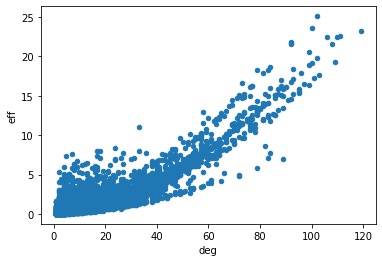

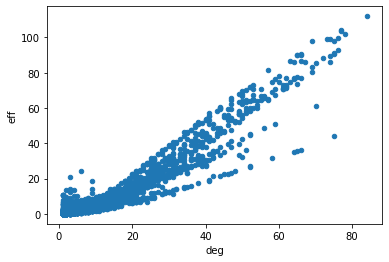

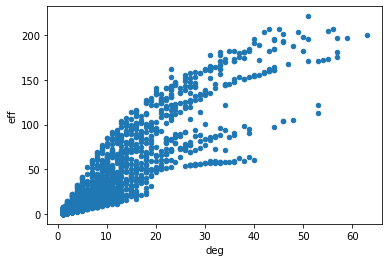

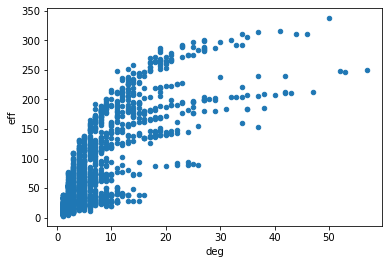

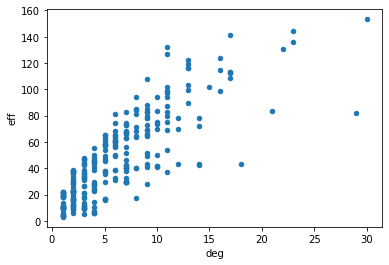

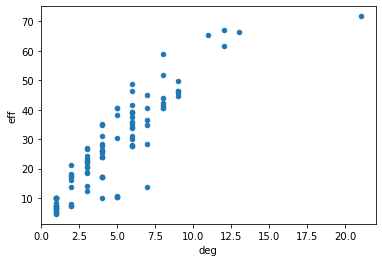

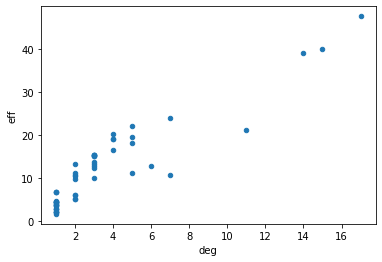

In [228]:
[pcc_dfs[i].plot.scatter('deg','eff') for i in thr_list]

In [159]:
sensor_dfs[0.3]

,orf_name,deg,eff,sens,trans,eigenvec_centr,closeness_centr,smallest_eigenvec,neighbor_degree,gene1,Systematic gene name,sensor_cluster,go_group
0,cem1,8,19.024903,78.248422,0.750000,7.988143e-11,0.113984,-0.002448,8.625000,cem1,YER061C,1.0,fatty acid metabolic process
1,aim22,10,19.812154,78.439643,0.622222,8.017645e-11,0.113994,-0.002453,7.700000,aim22,YJL046W,1.0,fatty acid metabolic process
2,etr1,7,15.270061,79.220229,0.809524,7.782998e-12,0.102357,-0.002468,7.857143,etr1,YBR026C,1.0,fatty acid metabolic process
3,htd2,8,16.001813,79.218922,0.821429,8.004045e-12,0.102361,-0.002468,7.625000,htd2,YHR067W,1.0,fatty acid metabolic process
4,lip2,10,19.812154,78.439643,0.622222,8.017645e-11,0.113994,-0.002453,7.700000,lip2,YLR239C,1.0,fatty acid metabolic process
5,lip5,8,16.001813,79.218922,0.821429,8.004042e-12,0.102361,-0.002468,7.625000,lip5,YOR196C,1.0,fatty acid metabolic process
6,lpd1,4,11.344847,79.383812,0.833333,5.021902e-12,0.102345,-0.002473,8.250000,lpd1,YFL018C,1.0,fatty acid metabolic process
7,lpd1-supp1,5,13.286361,79.167241,1.000000,7.412230e-12,0.102349,-0.002467,8.800000,lpd1-supp1,YFL018C,1.0,fatty acid metabolic process
8,mct1,7,15.259172,79.223154,0.904762,7.795662e-12,0.102357,-0.002468,8.142857,mct1,YOR221C,1.0,fatty acid metabolic process
9,oar1,6,13.971691,79.367389,0.800000,5.472296e-12,0.102353,-0.002471,7.833333,oar1,YKL055C,1.0,fatty acid metabolic process


In [237]:
%config Completer.use_jedi = False

In [239]:
#for i in thr_list:
i=0.5
for j in thr_list:
    print(i, j , (np.intersect1d(sensor_dfs[i].orf_name, pcc_dfs[j].orf_name)))

0.5 0.2 ['fzo1']
0.5 0.25 ['fzo1']
0.5 0.3 ['fzo1']
0.5 0.35 ['fzo1']
0.5 0.4 []
0.5 0.45 []
0.5 0.5 ['fzo1']


In [257]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns



In [262]:
def plot_kmeans(data,x,y):
    kmeans = KMeans(init="k-means++", n_clusters=5, n_init=1,
                random_state=0)
    X = np.array(data[y]).reshape(-1,1)
    y_km = kmeans.fit_predict(X)
    data['kmeans'] = y_km
    data.groupby('kmeans').sum().loc[y]
    sns.scatterplot(data=data,x=x,y=y,hue=y_km)

In [270]:
data =pcc_dfs[0.2].copy()
data['kmeans'] = y_km


In [275]:
data.groupby('kmeans').sum()['eff'].argmax()

4

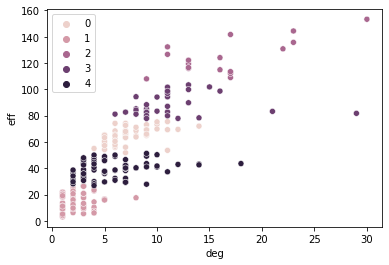

In [266]:
idx =0.4
plot_kmeans(pcc_dfs[idx], 'deg','eff')